In [164]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [569]:
G2_8 = np.loadtxt("./Data/G2-8.txt", dtype=float)
G2_10 = np.loadtxt("./Data/G2-10.txt", dtype=float)
G2_14 = np.loadtxt("./Data/G2-14.txt", dtype=float)
G2_20 = np.loadtxt("./Data/G2-20.txt", dtype=float)
G2_28 = np.loadtxt("./Data/G2-28.txt", dtype=float)

# B

In [669]:
G1_8 = np.loadtxt("./Data/G1-8.txt", dtype=float)
G1_10 = np.loadtxt("./Data/G1-10.txt", dtype=float)
G1_14 = np.loadtxt("./Data/G1-14.txt", dtype=float)
G1_20 = np.loadtxt("./Data/G1-20.txt", dtype=float)
G1_28 = np.loadtxt("./Data/G1-28.txt", dtype=float)

In [10]:
G1_10[:,0]

array([2.2 , 2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 ,
       2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 ])

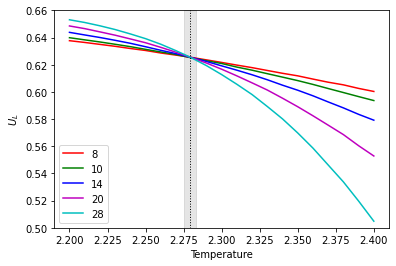

In [662]:
plt.plot(G1_8[:,0],G1_8[:,5],"r-",
         G1_8[:,0],G1_10[:,5],"g-",
         G1_8[:,0],G1_14[:,5],"b-",
         G1_8[:,0],G1_20[:,5],"m-",
         G1_8[:,0],G1_28[:,5],"c-")
plt.ylabel(r'$U_L$')
plt.xlabel('Temperature')
plt.legend(['8',"10","14","20","28"])
plt.axvline(x = 2.279, color = 'k',ls=':', lw=1)
plt.fill_between([2.275,2.283], [0.66,0.66],alpha=0.1,color="k")
plt.ylim(0.5,.66)
plt.savefig('Co.png', dpi=200, bbox_inches='tight')

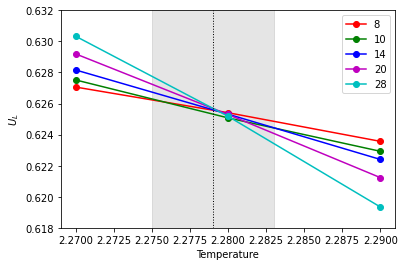

In [173]:
plt.plot(G1_8[7:10,0],G1_8[7:10,5],"ro-",
         G1_8[7:10,0],G1_10[7:10,5],"go-",
         G1_8[7:10,0],G1_14[7:10,5],"bo-",
         G1_8[7:10,0],G1_20[7:10,5],"mo-",
         G1_8[7:10,0],G1_28[7:10,5],"co-")
plt.ylabel(r'$U_L$')
plt.xlabel('Temperature')
plt.legend(['8',"10","14","20","28"])
plt.axvline(x = 2.279, color = 'k',ls=':', lw=1)
plt.fill_between([2.275,2.283], [0.66,0.66],alpha=0.1,color="k")
plt.ylim(0.618,.632)
plt.savefig('CT_close.png', dpi=200, bbox_inches='tight')

In [52]:
def intersection(A,B,T):
    """-----------------------------------------------
    Searchs for the x coordinate of the interception 
    between lines A and B
    --------------------------------------------------
    A: [y2,y1] coordinates of line A
    B: [y2,y1] coordinates of line B
    T: [x2,x1] coordinates of both line A and B
    --------------------------------------------------
    """
    return (T[1]*(A[0]-B[0]) + T[0]*(B[1]-A[1])) / (B[1]-B[0]-A[1]+A[0])

In [83]:
def search_intersection(A,B,T):
    """-----------------------------------------------
    Finds the points between which there is an 
    interception and then finds its x-value.
    --------------------------------------------------
    A: y coordinates of line A
    B: y coordinates of line B
    T: x coordinates of both line A and B
    --------------------------------------------------
    """
    for i in range(0,len(T)):
        if (A[i]-B[i])*(A[i+1]-B[i+1]) > 0:
            return intersection(A[i:i+2], B[i:i+2],T[i:i+2])

In [98]:
#Search for the critical temperature
lines = [G1_8[7:10,5],G1_10[7:10,5],G1_14[7:10,5],G1_20[7:10,5],G1_28[7:10,5]]
T = G1_8[7:10,0]
TC = []
for i in range(5):
    for j in range(i+1,5):
        TC.append(search_intersection(lines[i],lines[j],T))
[np.mean(TC),np.std(TC)]

[2.2793689993524255, 0.003915431336724338]

In [284]:
T_crit = 2.279

# C

In [250]:
lengths = np.array([8, 10, 14, 20, 28])
dU = []
IdT = 1/(T[2]-T[1])
for Y in lines:
    dU.append((Y[0]-Y[2])*IdT)
LdU = np.array(np.log(dU))

In [251]:
Llengths = sm.add_constant(np.log(lengths))
model = sm.OLS(LdU,Llengths)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     616.7
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           0.000143
Time:                        19:38:01   Log-Likelihood:                 10.777
No. Observations:                   5   AIC:                            -17.55
Df Residuals:                       3   BIC:                            -18.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8688      0.097    -29.698      0.000      -3.176      -2.561
x1             0.8858      0.036     24.834      0.000       0.772       0.999
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.933
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.768
Skew:                           0.888   Prob(JB):                        0.681
Kurtosis:                       2.271   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

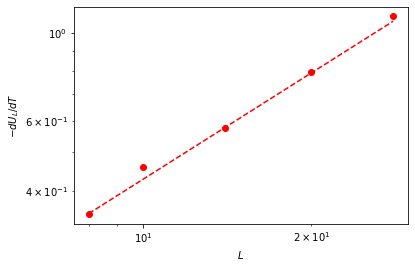

In [263]:
plt.plot(lengths,dU,"ro",lengths,np.exp(-2.9)*np.power(lengths,0.89),"r--")
plt.ylabel(r'$-dU_L/dT$')
plt.xlabel(r'$L$')
plt.yscale('log')
plt.xscale('log')
plt.savefig('dU.png', dpi=200, bbox_inches='tight')

$\nu = 1.12 \pm 0.05$ vs 1

# D

In [670]:
G1_8[:,2] = G1_8[:,2]/ 8**2
G1_10[:,2] =G1_10[:,2]/ 10**2
G1_14[:,2] =G1_14[:,2]/ 14**2
G1_20[:,2] =G1_20[:,2]/ 20**2
G1_28[:,2] =G1_28[:,2]/ 28**2

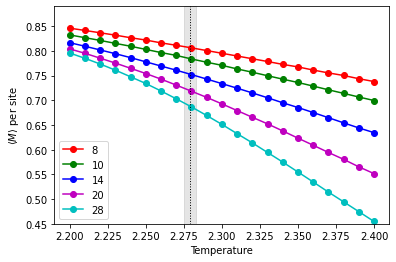

In [671]:
plt.plot(G1_8[:,0],G1_8[:,2],"ro-",
         G1_8[:,0],G1_10[:,2],"go-",
         G1_8[:,0],G1_14[:,2],"bo-",
         G1_8[:,0],G1_20[:,2],"mo-",
         G1_8[:,0],G1_28[:,2],"co-")
plt.ylabel(r'$\langle M \rangle$ per site')
plt.xlabel('Temperature')
plt.legend(['8',"10","14","20","28"])
plt.axvline(x = 2.279, color = 'k',ls=':', lw=1)
plt.fill_between([2.275,2.283], [0.89,0.89],alpha=0.1,color="k")
plt.ylim(0.45,.89)
plt.savefig('CT.png', dpi=200, bbox_inches='tight')

In [296]:
def Interpolation(Y,X,x):
    return (Y[1]*(x-X[0]) + Y[0]*(X[1]-x))/(X[1]-X[0])

lines_M = [G1_8[7:9,2],G1_10[7:9,2],G1_14[7:9,2],G1_20[7:9,2],G1_28[7:9,2]]
M = []
for Y in lines_M:
    M.append(Interpolation(Y,T[0:2],T_crit))

In [299]:
LM = np.array(np.log(M))
modelM = sm.OLS(LM,Llengths)
resultM = modelM.fit()
resultM.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.210e+04
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.66e-06
Time:                        20:32:20   Log-Likelihood:                 27.962
No. Observations:                   5   AIC:                            -51.92
Df Residuals:                       3   BIC:                            -52.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0479      0.003     15.429      0.001       0.038       0.058
x1            -0.1262      0.001   -109.977      0.000      -0.130      -0.123
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.725
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.588
Skew:                           0.194   Prob(JB):                        0.745
Kurtosis:                       1.365   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

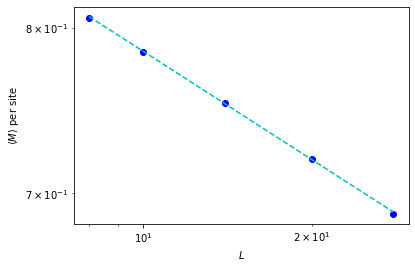

In [664]:
plt.plot(lengths,M,"bo",lengths,np.exp(0.048)*np.power(lengths,-0.126),"c--")
plt.ylabel(r'$\langle M \rangle$ per site')
plt.xlabel(r'$L$')
plt.yscale('log')
plt.xscale('log')
plt.savefig('M.png', dpi=200, bbox_inches='tight')

$\beta/\nu = 0.126 \pm 0.001$ vs 0.125

# E

## C_V

In [395]:
# Define the Gaussian function
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

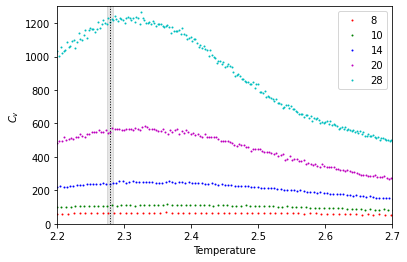

In [459]:
plt.plot(G2_8[:,0],G2_8[:,3],"ro",
         G2_10[:,0],G2_10[:,3],"go",
         G2_14[:,0],G2_14[:,3],"bo",
         G2_20[:,0],G2_20[:,3],"mo",
         G2_28[:,0],G2_28[:,3],"co",markersize=1)
plt.ylabel(r'$C_v$')
plt.xlabel('Temperature')
plt.legend(['8',"10","14","20","28"])
plt.axvline(x = 2.279, color = 'k',ls=':', lw=1)
plt.fill_between([2.275,2.283], [11000,11000],alpha=0.1,color="k")
plt.ylim(0,1300)
plt.xlim(2.2,2.7)
plt.savefig('Cv.png', dpi=200, bbox_inches='tight')

### 8

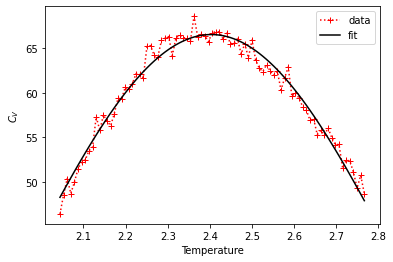

2.4032262313605126 $\pm$ 0.0019285135554017454


In [447]:
x = np.asarray(G2_8[125:210,0])
y = np.asarray(G2_8[125:210,3])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'r+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])

### 10

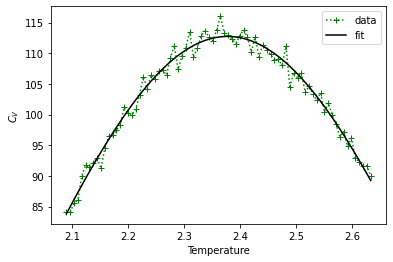

2.377140757145229 $\pm$ 0.0013152660049875525


In [448]:
x = np.asarray(G2_10[125:205,0])
y = np.asarray(G2_10[125:205,3])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'g+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])

### 14

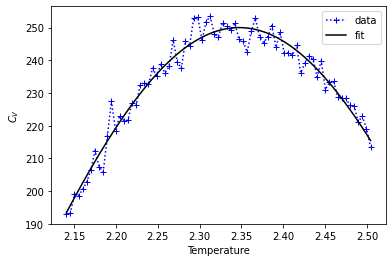

2.3472105422786758 $\pm$ 0.001459025468959029


In [449]:
x = np.asarray(G2_14[125:200,0])
y = np.asarray(G2_14[125:200,3])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])

### 20

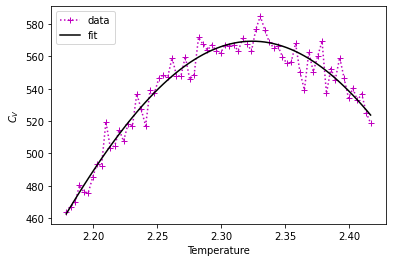

2.324420813303387 $\pm$ 0.0016093530745463218


In [450]:
x = np.asarray(G2_20[125:195,0])
y = np.asarray(G2_20[125:195,3])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'m+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])

### 28

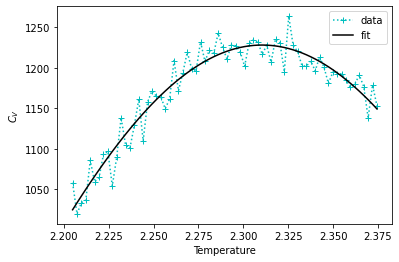

2.3105042068094908 $\pm$ 0.001457217815196232


In [526]:
x = np.asarray(G2_28[125:195,0])
y = np.asarray(G2_28[125:195,3])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'c+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$C_V$')
plt.xlabel('Temperature')
plt.savefig('Cv_Gauss.png', dpi=200, bbox_inches='tight')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])

## $\chi$

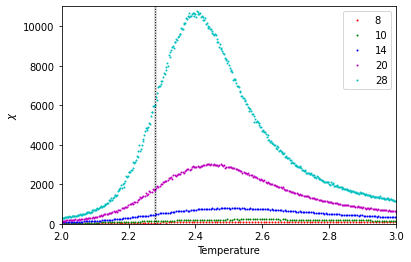

In [570]:
plt.plot(G2_8[:,0],G2_8[:,4],"ro",
         G2_10[:,0],G2_10[:,4],"go",
         G2_14[:,0],G2_14[:,4],"bo",
         G2_20[:,0],G2_20[:,4],"mo",
         G2_28[:,0],G2_28[:,4],"co",markersize=1)
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.legend(['8',"10","14","20","28"])
plt.axvline(x = 2.279, color = 'k',ls=':', lw=1)
plt.fill_between([2.275,2.283], [11000,11000],alpha=0.1,color="k")
plt.ylim(0,11000)
plt.xlim(2,3)
plt.savefig('Cchi.png', dpi=200, bbox_inches='tight')

### 8

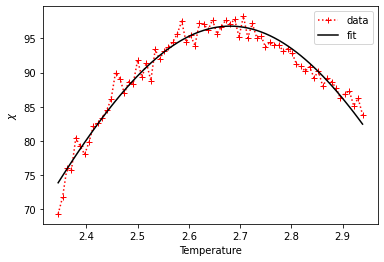

2.680402646631354 $\pm$ 0.0027672563950758675
96.79857919333476


In [571]:
x = np.asarray(G2_8[160:230,0])
y = np.asarray(G2_8[160:230,4])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'r+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))

### 10

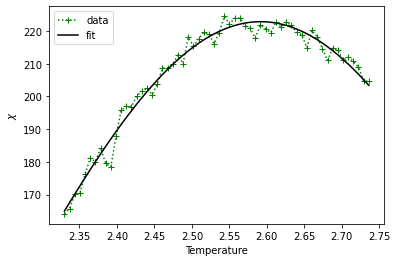

2.5916671402116283 $\pm$ 0.0022070863447358675
222.83341001624436


In [572]:
x = np.asarray(G2_10[160:220,0])
y = np.asarray(G2_10[160:220,4])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'g+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))

### 14

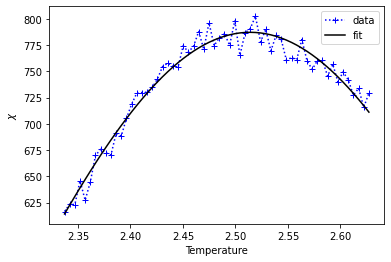

2.514001596828932 $\pm$ 0.0016494178793776243
787.0765678191303


In [573]:
x = np.asarray(G2_14[165:225,0])
y = np.asarray(G2_14[165:225,4])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))

### 20

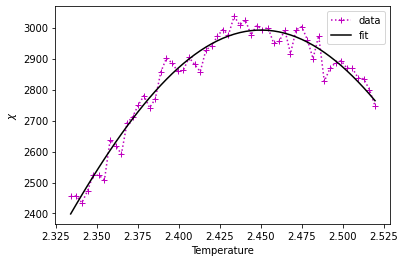

2.4501866261240624 $\pm$ 0.0012916954767011688
2992.2225646125075


In [574]:
x = np.asarray(G2_20[170:225,0])
y = np.asarray(G2_20[170:225,4])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'m+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))

### 28

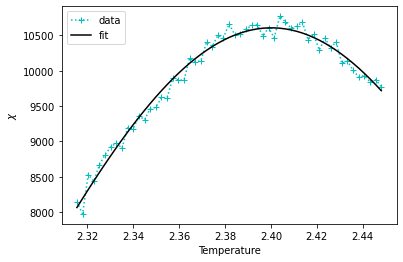

2.4002425164072254 $\pm$ 0.0007015886229385775
10607.489214694258


In [575]:
x = np.asarray(G2_28[170:225,0])
y = np.asarray(G2_28[170:225,4])

popt,pcov = curve_fit(gauss,x,y,p0=[1,2.4,.1])
  
plt.plot(x,y,'c+:',label='data')
plt.plot(x,gauss(x,*popt),'k-',label='fit')
plt.legend()
plt.ylabel(r'$\chi$')
plt.xlabel('Temperature')
plt.show()
print(popt[1],r"$\pm$",np.sqrt(np.diag(pcov))[1])
print(gauss(popt[1],*popt))

In [497]:
Cv = np.array([2.403,2.377,2.347,2.324,2.311])
chi = np.array([2.680,2.592,2.514,2.450,2.400])
Lv = 1./np.power(lengths,0.89)
LvA = sm.add_constant(Lv)

In [498]:
model = sm.OLS(Cv,LvA)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2938.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.38e-05
Time:                        23:06:30   Log-Likelihood:                 27.060
No. Observations:                   5   AIC:                            -50.12
Df Residuals:                       3   BIC:                            -50.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2641      0.002   1297.841      0.000       2.259       2.270
x1             0.8788      0.016     54.206      0.000       0.827       0.930
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.662
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.551
Skew:                           0.368   Prob(JB):                        0.759
Kurtosis:                       1.550   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [499]:
model = sm.OLS(chi,LvA)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1240.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           5.03e-05
Time:                        23:06:52   Log-Likelihood:                 19.492
No. Observations:                   5   AIC:                            -34.98
Df Residuals:                       3   BIC:                            -35.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2665      0.008    285.974      0.000       2.241       2.292
x1             2.5939      0.074     35.216      0.000       2.360       2.828
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.552
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.487
Skew:                          -0.707   Prob(JB):                        0.784
Kurtosis:                       2.417   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

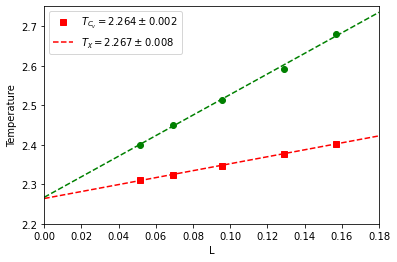

In [524]:
plt.plot(Lv,Cv,"rs",
         np.linspace(0, .18, num=5),np.linspace(0, .18, num=5)*0.88+2.264,"r--",
         Lv,chi,"go",
         np.linspace(0, .18, num=5),np.linspace(0, .18, num=5)*2.60+2.267,"g--",)
plt.ylabel('Temperature')
plt.xlabel('L')
plt.legend([r'$T_{C_v} = 2.264\pm0.002$',r"$T_{\chi} = 2.267\pm0.008$"])
plt.ylim(2.2,2.75)
plt.xlim(0,.18)
plt.savefig('chiCv.png', dpi=200, bbox_inches='tight')

# F

### $M^2$

In [556]:
G1_8[:,6] = G1_8[:,6]/ 8**2
G1_10[:,6] =G1_10[:,6]/ 10**2
G1_14[:,6] =G1_14[:,6]/ 14**2
G1_20[:,6] =G1_20[:,6]/ 20**2
G1_28[:,6] =G1_28[:,6]/ 28**2

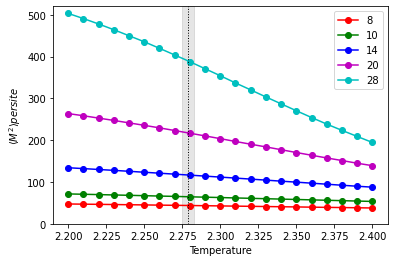

In [557]:
plt.plot(G1_8[:,0],G1_8[:,6],"ro-",
         G1_8[:,0],G1_10[:,6],"go-",
         G1_8[:,0],G1_14[:,6],"bo-",
         G1_8[:,0],G1_20[:,6],"mo-",
         G1_8[:,0],G1_28[:,6],"co-")
plt.ylabel(r'$\langle M^2 \rangle per site$')
plt.xlabel('Temperature')
plt.legend(['8',"10","14","20","28"])
plt.axvline(x = 2.279, color = 'k',ls=':', lw=1)
plt.fill_between([2.275,2.283], [520,520],alpha=0.1,color="k")
plt.ylim(0,520)
plt.savefig('M2.png', dpi=200, bbox_inches='tight')

In [558]:
lines_M2 = [G1_8[7:9,6],G1_10[7:9,6],G1_14[7:9,6],G1_20[7:9,6],G1_28[7:9,6]]
M2 = []
for Y in lines_M2:
    M2.append(Interpolation(Y,T[0:2],T_crit))

In [578]:
LM2 = np.array(np.log(M2))
modelM2 = sm.OLS(LM2,Llengths)
resultM2 = modelM2.fit()
resultM2.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.498e+05
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           4.21e-09
Time:                        00:00:25   Log-Likelihood:                 24.787
No. Observations:                   5   AIC:                            -45.57
Df Residuals:                       3   BIC:                            -46.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1516      0.006     25.856      0.000       0.133       0.170
x1             1.7451      0.002    806.079      0.000       1.738       1.752
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.653
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.574
Skew:                           0.159   Prob(JB):                        0.751
Kurtosis:                       1.372   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $\chi$

In [560]:
G1_8[:,4] = G1_8[:,4]/ 8**2
G1_10[:,4] =G1_10[:,4]/ 10**2
G1_14[:,4] =G1_14[:,4]/ 14**2
G1_20[:,4] =G1_20[:,4]/ 20**2
G1_28[:,4] =G1_28[:,4]/ 28**2

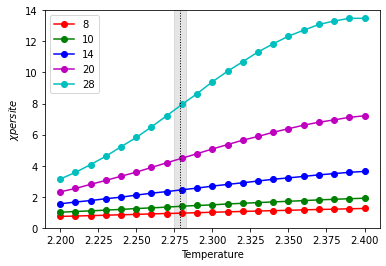

In [561]:
plt.plot(G1_8[:,0],G1_8[:,4],"ro-",
         G1_8[:,0],G1_10[:,4],"go-",
         G1_8[:,0],G1_14[:,4],"bo-",
         G1_8[:,0],G1_20[:,4],"mo-",
         G1_8[:,0],G1_28[:,4],"co-")
plt.ylabel(r'$\chi per site$')
plt.xlabel('Temperature')
plt.legend(['8',"10","14","20","28"])
plt.axvline(x = 2.279, color = 'k',ls=':', lw=1)
plt.fill_between([2.275,2.283], [520,520],alpha=0.1,color="k")
plt.ylim(0,14)
plt.savefig('chiPer.png', dpi=200, bbox_inches='tight')

In [564]:
lines_chi = [G1_8[7:9,4],G1_10[7:9,4],G1_14[7:9,4],G1_20[7:9,4],G1_28[7:9,4]]
chiPer = []
for Y in lines_chi:
    chiPer.append(Interpolation(Y,T[0:2],T_crit))

In [580]:
LMcP = np.array(np.log(chiPer))
modelMcP = sm.OLS(LMcP,Llengths)
resultMcP = modelMcP.fit()
resultMcP.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.586e+05
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.68e-08
Time:                        00:02:31   Log-Likelihood:                 22.637
No. Observations:                   5   AIC:                            -41.27
Df Residuals:                       3   BIC:                            -42.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5765      0.009   -396.839      0.000      -3.605      -3.548
x1             1.6924      0.003    508.538      0.000       1.682       1.703
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.606
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.337
Skew:                           0.601   Prob(JB):                        0.845
Kurtosis:                       2.584   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $\chi_{max}$

In [576]:
chi_max = np.array([96.79857919333476/8**2,
                    222.83341001624436/10**2,
                    787.0765678191303/14**2,
                    2992.2225646125075/20**2,
                    10607.489214694258/28**2])

In [583]:
LMcM = np.array(np.log(chi_max))
modelMcM = sm.OLS(LMcM,Llengths)
resultMcM = modelMcM.fit()
resultMcM.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.309e+05
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           3.53e-09
Time:                        00:04:21   Log-Likelihood:                 25.071
No. Observations:                   5   AIC:                            -46.14
Df Residuals:                       3   BIC:                            -46.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2245      0.006   -582.094      0.000      -3.242      -3.207
x1             1.7488      0.002    854.938      0.000       1.742       1.755
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.159
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.518
Skew:                           0.071   Prob(JB):                        0.772
Kurtosis:                       1.430   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/x1/5n0q4k651yn3nwgl1ql4f9jc0000gn/T/ipykernel_2296/3561923955.py:9: UserWarning: The handle <matplotlib.lines.Line2D object at 0x12e0ffcd0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend([r'$\langle M^2 \rangle$: $1.745\pm0.002$', '_nolegend_',
/var/folders/x1/5n0q4k651yn3nwgl1ql4f9jc0000gn/T/ipykernel_2296/3561923955.py:9: UserWarning: The handle <matplotlib.lines.Line2D object at 0x12e0fe590> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend([r'$\langle M^2 \rangle$: $1.745\pm0.002$', '_nolegend_',


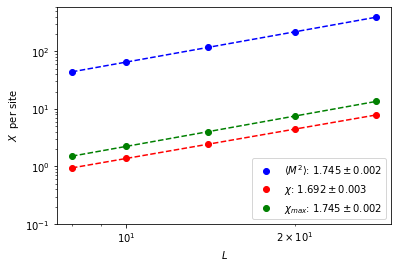

In [663]:
plt.plot(lengths,M2,"bo",lengths,np.exp(0.157)*np.power(lengths,1.745),"b--",
        lengths,chiPer,"ro",lengths,np.exp(-3.577)*np.power(lengths,1.692),"r--",
        lengths,chi_max,"go",lengths,np.exp(-3.225)*np.power(lengths,1.7488),"g--")
plt.ylabel(r'$X$  per site')
plt.xlabel(r'$L$')
plt.yscale('log')
plt.xscale('log')
plt.ylim(.1,600)
plt.legend([r'$\langle M^2 \rangle$: $1.745\pm0.002$', '_nolegend_',
           r'$\chi$: $1.692\pm0.003$', '_nolegend_',
           r'$\chi_{max}$: $1.745\pm0.002$'])
plt.savefig('GAMMA.png', dpi=200, bbox_inches='tight')

In [598]:
print(np.mean([1.745,1.692,1.745]))
print(np.std([1.745,1.692,1.745]))

1.7273333333333334
0.024984439601924754


$\gamma/\nu=1.73\pm0.03$ vs $1.75$

# G

In [665]:
G2_8 = np.loadtxt("./Data/G2-8.txt", dtype=float)
G2_10 = np.loadtxt("./Data/G2-10.txt", dtype=float)
G2_14 = np.loadtxt("./Data/G2-14.txt", dtype=float)
G2_20 = np.loadtxt("./Data/G2-20.txt", dtype=float)
G2_28 = np.loadtxt("./Data/G2-28.txt", dtype=float)

In [666]:
Bv = 0.126
vI = 0.89
Gv = 1.73

In [667]:
M8  = np.power(8,Bv-2) *G2_8[:,2]
M10 = np.power(10,Bv-2)*G2_10[:,2]
M14 = np.power(14,Bv-2)*G2_14[:,2]
M20 = np.power(20,Bv-2)*G2_20[:,2]
M28 = np.power(28,Bv-2)*G2_28[:,2]

In [657]:
T18  = 8**vI *(G2_8[:,0]  - T_crit)/T_crit
T110 = 10**vI*(G2_10[:,0] - T_crit)/T_crit
T114 = 14**vI*(G2_14[:,0] - T_crit)/T_crit
T120 = 20**vI*(G2_20[:,0] - T_crit)/T_crit
T128 = 28**vI*(G2_28[:,0] - T_crit)/T_crit

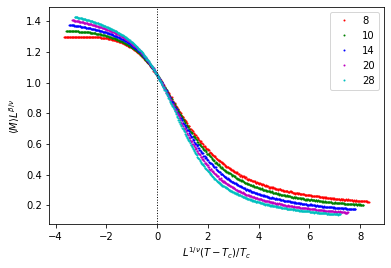

In [658]:
plt.plot(T18,M8,"ro",
        T110,M10,"go",
        T114,M14,"bo",
        T120,M20,"mo",
        T128,M28,"co",markersize = 1)
plt.ylabel(r'$\langle M \rangle L^{\beta/\nu}$')
plt.xlabel(r'$L^{1/\nu}(T-T_c)/T_c$')
plt.legend(["8","10","14","20","28"])
plt.savefig('Mscale.png', dpi=200, bbox_inches='tight')
plt.axvline(x = 0, color = 'k',ls=':', lw=1)

In [659]:
X8  = np.power(8, -Gv-2) *G2_8[:,4]
X10 = np.power(10,-Gv-2)*G2_10[:,4]
X14 = np.power(14,-Gv-2)*G2_14[:,4]
X20 = np.power(20,-Gv-2)*G2_20[:,4]
X28 = np.power(28,-Gv-2)*G2_28[:,4]

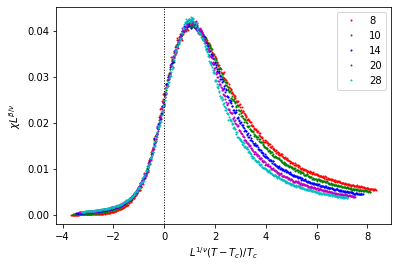

In [660]:
plt.plot(T18,X8,"ro",
        T110,X10,"go",
        T114,X14,"bo",
        T120,X20,"mo",
        T128,X28,"co",markersize = 1)
plt.ylabel(r'$\chi L^{\beta/\nu}$')
plt.xlabel(r'$L^{1/\nu}(T-T_c)/T_c$')
plt.legend(["8","10","14","20","28"])
plt.savefig('Chiscale.png', dpi=200, bbox_inches='tight')
plt.axvline(x = 0, color = 'k',ls=':', lw=1)

# H

In [661]:
2*Bv + Gv -2

-0.018000000000000016

In [ ]:
<<T<<"0"
<<Eprom<<"1"
<<Mprom<<"2"
<<Cv<<"3"
<<Xs<<"4"
<<Ub<<"5"
<<M2prom<<"6;